# FAIR and scalable management of small-angle X-ray scattering data  
## Module 3: Data analysis and visualization
### 3.1: Lorentzian fit with SAS-tools

> Authors: Torsten Giess, Richard Schoemig 
> Last modified: 19.12.2022

---

### **Abstract** <a class="anchor" name="abstract"></a>

Using novel packages [sastools](https://github.com/FAIRChemistry/SAS-tools) (version 0.3.2) and [pyAnIML](https://github.com/FAIRChemistry/pyAnIML) (version 1.0.0), as well as packages from the Python 3 standard libary, this notebook provides an integrated fitting tool based on the python packages lmfit and signal.

---

### **Table of Contents** <a class="anchor" name="table_of_contents"></a>

- [Abstract](#abstract)
- [Workflow](#workflow)
    - [User guide](#user_guide)
    - [Preparation](#preparation)
    - [Lorentzian fit with Origin](#origin)
- [Disclosure](#disclosure)

---

### **Workflow** <a class="anchor" name="workflow"></a>

Following is the workflow for Module 3.1: Lorentzian fit with Origin of FAIR and scalable management of small-angle X-ray scattering data.

#### **User guide** <a class="anchor" name="user_guide"></a>

This notebook can be used to create TSV files from data(sets) stored in the AnIML file and export them to external software for further analyses inlcuding Lorentzian fits of diffraction maxima.

#### **Preparation** <a class="anchor" name="preparation"></a>

This section contains the necessary preparations for using this module. Code cells in this section are required regardless of which functionality of this notebook is used. First, the required packages from the [Python 3 standard library](https://docs.python.org/3/library/), the Python Package Index ([PyPI](https://pypi.org/)), and *ad hoc* modules of this work are imported. Then, both current time and path are retrieved and stored in the desired formats.

In [95]:
print("Importing standard library packages.")
from datetime import date
from pathlib import Path
import numpy as np
print ("Done.")

Importing standard library packages.
Done.


In [96]:
print("Importing PyPI packages.")
from pyaniml import AnIMLDocument
from sastools.analyzer import Analyzer
from sastools.readers import SeriesReader
print ("Done.")

Importing PyPI packages.
Done.


In [97]:
date_suffix = str(date.today()).replace("-", "")[2:]

In [98]:
cwd = Path.cwd()
path_to_datasets = cwd / "./datasets/"
print(cwd)
print(path_to_datasets)

/mnt/c/Users/rscho/Documents/GitHub/SAS-workflows/workflows/Giess_2022
/mnt/c/Users/rscho/Documents/GitHub/SAS-workflows/workflows/Giess_2022/datasets


---

#### **Lorentzian fit with Origin** <a class="anchor" name="origin"></a>

Extract data from the AnIML file and store it in a TSV file to continue with Lorentzian fits in Origin (or any other software of choice).

Export $q$ and $I$ to TSV for export to Origin:

In [99]:
path_to_AnIML_file = path_to_datasets / f"download/fairsaxs_220512/fairsaxs_220512.animl"

In [100]:
with path_to_AnIML_file.open("r") as f:
    xml_string = f.read()
    animl_doc = AnIMLDocument.fromXMLString(xml_string)

In [101]:
reader = SeriesReader(animl_doc)

In [102]:
list_of_IDs = reader.available_seriesIDs
for series_ID in list_of_IDs:
    print(series_ID)

CholPal_20220214
OTAB_010wtp_T025
OTAB_020wtp_T025
OTAB_030wtp_T025
OTAB_040wtp_T025
OTAB_050wtp_T025
OTAB_061wtp_T025
OTAB_062wtp_T025
OTAB_063wtp_T025
OTAB_064wtp_T025
OTAB_065wtp_T025
OTAB_066wtp_T025
OTAB_067wtp_T025
OTAB_068wtp_T025
OTAB_069wtp_T025
OTAB_070wtp_T025
OTAB_071wtp_T025
OTAB_073wtp_T025
OTAB_074wtp_T025
OTAB_075wtp_T025
OTAB_078wtp_T025
OTAB_079wtp_T025
OTAB_080wtp_T025
OTAB_090wtp_T025
OTAB_100wtp_T025
OTAB_078wtp_T058
OTAB_078wtp_T060
OTAB_082wtp_T025
OTAB_093wtp_T025
OTAB_100wtp_T095
OTAC_001wtp_T025
OTAC_005wtp_T025
OTAC_010wtp_T025
OTAC_020wtp_T025
OTAC_030wtp_T025
OTAC_040wtp_T025
OTAC_050wtp_T025
OTAC_060wtp_T025
OTAC_061wtp_T025
OTAC_062wtp_T025
OTAC_063wtp_T025
OTAC_064wtp_T025
OTAC_065wtp_T025
OTAC_066wtp_T025
OTAC_067wtp_T025
OTAC_068wtp_T025
OTAC_069wtp_T025
OTAC_070wtp_T025
OTAC_080wtp_T025
OTAC_090wtp_T025
OTAC_091wtp_T025
OTAC_092wtp_T025
OTAC_093wtp_T025
OTAC_094wtp_T025
OTAC_095wtp_T025
OTAC_100wtp_T025
OTAC_085wtp_T074
OTAC_090wtp_T010
OTAC_094wtp_T0

In [103]:
reader.selected_seriesIDs = [list_of_IDs[0]] # , list_of_IDs[3]]
dataframe = reader.create_dataframe()
print(dataframe)

      CholPal_20220214_q  CholPal_20220214_i
0               0.114488        2.772433e-12
1               0.121128        8.453862e-12
2               0.127769        1.096632e-12
3               0.134409        1.764940e-12
4               0.141050        7.023565e-13
...                  ...                 ...
1100            7.328884        2.915681e-06
1101            7.335285        4.923844e-11
1102            7.348087        7.298661e-08
1103            7.360886        5.776745e-08
1104            7.367286        9.793908e-08

[1105 rows x 2 columns]


In [104]:
file_name = reader.selected_seriesIDs[0]
if 'OTAB' in file_name:
    compound = 'OTAB'
    print(compound, 'is selected')
elif 'OTAC' in file_name:
    compound = 'OTAC'
    print(compound, 'is selected')
else:
    print('CholPal is selected')

CholPal is selected


In [105]:
path_to_sastools_curvefitting = path_to_datasets / f'./raw/{compound}_measurement_data/Lorentzian_fitting_data/sastools-curvefitting/'
path_to_plots = path_to_sastools_curvefitting / './plots/'
path_to_fitting_data = path_to_sastools_curvefitting / './fitting_data/'

number of found peaks: 7
peak number: 1 x: 0.3070601 y: 10.65627
peak number: 2 x: 1.169988 y: 4.990954
peak number: 3 x: 2.342835 y: 17.8426
peak number: 4 x: 3.51791 y: 4.338875
peak number: 5 x: 4.69296 y: 0.3574511
peak number: 6 x: 6.073134 y: 0.3740223
peak number: 7 x: 6.706043 y: 0.4865745


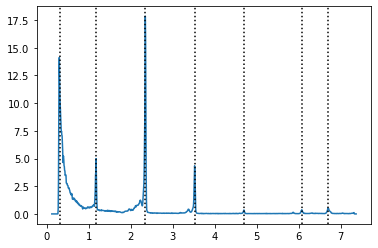

In [106]:
analyzer = Analyzer(
    dataframe,                # creating an instance of Analyzer and initialize with the experimental data as pd.DataFrame
    file_name,
    path_to_plots,
    path_to_fitting_data
) 
# analyzer.plot_data()
analyzer.find_peaks_cwt(                        # searching for peaks using the cwt method
    peak_widths= 5,# np.arange(0.5, 10.),             # withs of the peaks that are of interest
    cutoff_amplitude=0.3           
)

In [107]:
analyzer.set_specifications_automatically(
    model_type = 'LorentzianModel',           # model type ('GaussianModel', 'LorentzianModel' or 'VoigtModel')
    tolerance = 0.01                           # tolerated variance of the peak location between model parameters given by 
                                              # the automatic_peak_finding and the final fit parameters (default is 0.5)
)

In [108]:
# analyzer.set_specifications_manually(           # setting up the specifications for the fitting process
#     number_of_models=1,                         # number of models to fit the data 
#     model_specifications = [                    # specifications for every single model to be used for fitting.
#                                                 # Unlike for the automatically set specifications, different model types can be mixed! (See model type)
#                                                 # number_of_models parameter has to match with the actual number of models provided in the input.
#                                                 # (This restriction will be lifted and excess models will be fitted automatically and used as
#                                                 # 'auxiliary models' for small peaks/noise/biases).
#         [
#             'LorentzianModel',                  # model type ('GaussianModel', 'LorentzianModel' or 'VoigtModel')
#             [2.3, 0.85, 1.],                     # model parameters (center, amplitude, sigma) see also https://lmfit.github.io/lmfit-py/builtin_models.html
#             [2.3, 2.4]                           # restriction parameters (lower and upper bound of center parameter)
#         ],                                      # ...
#         [                                       # ..
#             'LorentzianModel',                  # .
#             [2.6, 0.5, 0.1],
#             [2.55, 2.65]
#         ],
#         [
#             'LorentzianModel',
#             [2.7, 1.7, 0.1],
#             [2.65, 2.75]
#         ],
#         [
#             'LorentzianModel',
#             [2.85, 0.27, 0.1],
#             [2.8, 2.9]
#         ],
#         [
#             'LorentzianModel',
#             [3., 0.1, 0.1],
#             [2.95, 3.05]
#         ],
#         [
#             'LorentzianModel',
#             [3.14, 5., 0.05],
#             [3.1, 3.16]
#         ],
#         [
#             'LorentzianModel',
#             [5.9, 0.1, 0.1],
#             [5.85, 5.95]
#         ],
#         [
#             'LorentzianModel',
#             [6.2, 0.7, 0.1],
#             [6.15, 6.25]
#         ]
#     ]
# )

model6_amplitude : 0.13133807319394253
model6_center : 6.716042999998604
model6_sigma : 7.252471964593311
model5_amplitude : 0.07915687311639241
model5_center : 6.083133999997711
model5_sigma : 7.245404248770734
model4_amplitude : 0.3979958557742508
model4_center : 4.702959999999157
model4_sigma : 6.296036859229399
model3_amplitude : 0.0038763144666972282
model3_center : 3.527909999866952
model3_sigma : 4.567822089286464
model2_amplitude : 0.6724857642170298
model2_center : 2.343504249817807
model2_sigma : 0.011608001558428569
model1_amplitude : 1.863707901101142
model1_center : 1.1599931056673425
model1_sigma : 0.8305926172908825
model0_amplitude : 1.4813243960738625
model0_center : 0.31706008803489644
model0_sigma : 0.043850257136370765


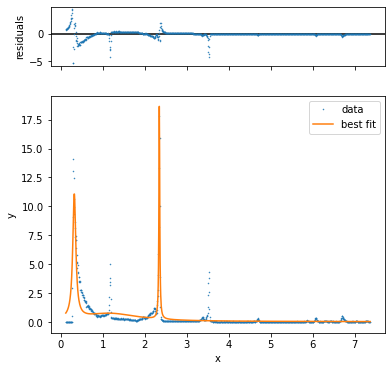

In [109]:
analyzer.fit()                                  # fit the model using the generated specifications set (dict in json format)
analyzer.plot_fit() 

In [110]:
analyzer.list_of_model_centers()


---

### **Disclosure** <a class="anchor" name="disclosure"></a>

**Contributions**

If you wish to contribute to the FAIR Chemistry project, find us on [GitHub](https://github.com/FAIRChemistry)!

**MIT License**

Copyright (c) 2022 FAIR Chemistry

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.